In [1289]:
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.patches as patches
from time import time
from scipy.spatial import ConvexHull

def rect_to_points(x,y,width,height,angle):
    # x, y, width, height , angle --> (left, top) , (right, top), (right, bottom), (left, bottom)
    rad = np.deg2rad(angle)
    cos = np.cos(rad)
    sin = np.sin(rad)
    
    xs = np.array([-width/2, width/2, width/2, -width/2], dtype='float32')
    ys = np.array([-height/2, -height/2, height/2, height/2],dtype='float32')

    ro_xs = (cos * xs - sin * ys) + x
    ro_ys = (sin * xs + cos * ys) + y 

    return ro_xs, ro_ys 

def calculate_cross_points(x1,y1,x2,y2,x3,y3,x4,y4):

    # cross point of two lines
    d = (x1 - x2) * (y3 - y4) - (y1 -y2) * (x3 - x4)
    nx = (x1*y2 - y1*x2) * (x3 - x4) - (x1 - x2) * (x3*y4 - y3*x4)
    ny = (x1*y2 - y1*x2) * (y3 - y4) - (y1 - y2) * (x3*y4 - y3*x4)

    margin = 0.01
        
    cross_point = None
    if d != 0:
        
        # 소수점 3자리까지만 계산
        px = round(nx/d,3)
        py = round(ny/d,3)
        
        # margin for float points ex) 1. = 0.9999999
        min_x1 = min(x1, x2) * (1. - margin)
        max_x1 = max(x1, x2) * (1. + margin)
        min_y1 = min(y1, y2) * (1. - margin)
        max_y1 = max(y1, y2) * (1. + margin)
        min_x2 = min(x3, x4) * (1. - margin)
        max_x2 = max(x3, x4) * (1. + margin)
        min_y2 = min(y3, y4) * (1. - margin)
        max_y2 = max(y3, y4) * (1. + margin)

        # check cross point boundary
        if px >= min_x1 and px <= max_x1 and py >= min_y1 and py <= max_y1:
            if px >= min_x2 and px <= max_x2 and py >= min_y2 and py <= max_y2:
                cross_point = (px, py)
    
    return cross_point

def get_cross_points(rect1, rect2):    
    # rect1 = [x, y, width, height, angle]
    # angle == degree

    rect1_xs, rect1_ys = rect_to_points(*rect1)
    rect2_xs, rect2_ys = rect_to_points(*rect2)

    cross_points = [] 

    for i in range(-1, 3):
        x1, y1, x2, y2 = rect1_xs[i], rect1_ys[i], rect1_xs[i+1], rect1_ys[i+1]
        for j in range(-1,3):
            x3, y3, x4, y4 = rect2_xs[j], rect2_ys[j], rect2_xs[j+1], rect2_ys[j+1]
            cross_point = calculate_cross_points(x1,y1,x2,y2,x3,y3,x4,y4)
            if cross_point != None:                
               cross_points.append(cross_point)
    
    # de-duplication
    cross_points = list(set(cross_points))
    return cross_points

def get_inner_points(rect1, rect2):
    # find inner points of rect 2 that exist in rectangle1

    # rect1 = [x, y, width, height, angle]
    # angle == degree
    
    rect1_xs, rect1_ys = rect_to_points(*rect1)
    rect2_xs, rect2_ys = rect_to_points(*rect2) 

    inner_points = []
    
    for j in range(-1, 3):
        flag_inner = True
        for i in range(-1, 3):
            rect1_x1, rect1_y1, rect1_x2, rect1_y2 = rect1_xs[i], rect1_ys[i], rect1_xs[i+1], rect1_ys[i+1]
            rect2_x, rect2_y = rect2_xs[j], rect2_ys[j]

            x1 = rect1_x2 - rect1_x1
            y1 = rect1_y2 - rect1_y1
            x2 = rect2_x - rect1_x1
            y2 = rect2_y - rect1_y1
            
            cross_product = (x1*y2 - y1*x2)
            # print('rect1, x1,y1',rect1_x1, rect1_y1)
            # print('rect1, x2,y2',rect1_x2, rect1_y2)
            # print('rect2, x,y', rect2_x, rect2_y)
            # print(cross_product)
            if cross_product < 0:
                flag_inner = False
        if flag_inner:
            inner_points.append((round(rect2_x,3),round(rect2_y,3)))
    
    return inner_points

def get_random_rotated_rectanlge(canvas_width, canvas_height):
    width = np.random.randint(canvas_width//10, canvas_width//2) 
    height = np.random.randint(canvas_height//10, canvas_height//2) 
    x = np.random.randint(int(canvas_width*0.3), int(canvas_width *0.7))
    y = np.random.randint(int(canvas_height*0.3), int(canvas_height *0.7))
    angle = np.random.randint(0, 360)
        
    # int -> float
    rect = list(map(float, [x, y, width, height, angle]))
    return rect


In [1290]:
canvas_width = 200
canvas_height = 200
rect1_points = get_random_rotated_rectanlge(canvas_width=canvas_width, canvas_height=canvas_height)
rect2_points = get_random_rotated_rectanlge(canvas_width=canvas_width, canvas_height=canvas_height)

rect1_area = rect1_points[2] * rect1_points[3]
rect2_area = rect2_points[2] * rect2_points[3]


print('rectangle1 points_x,y,width,height,angle: ', rect1_points)
print('rectangle2 points_x,y,width,height,angle: ', rect2_points)

xy_rect1 = rect_to_points(*rect1_points)
xy_rect2 = rect_to_points(*rect2_points)
print('rectangle1 points_x,y: ', xy_rect1)
print('rectangle2 points_x,y: ', xy_rect2)


start = time()
# cross points 
cross_points = get_cross_points(rect1_points, rect2_points)
print('cross points: ' , cross_points)

# inner points 
rect1_inner_points = get_inner_points(rect2_points, rect1_points)
rect2_inner_points = get_inner_points(rect1_points, rect2_points)

print('rect1 inner points: ' , rect1_inner_points)
print('rect2 inner points: ' , rect2_inner_points)

# intersection region 
intersection_points = cross_points + rect1_inner_points + rect2_inner_points
# de-duplication
intersection_points = list(set(intersection_points))
print('intersection points: ', intersection_points)

print(f'delay: {(time() - start) * 1000.:.2f} ms')




rectangle1 points_x,y,width,height,angle:  [135.0, 95.0, 44.0, 95.0, 283.0]
rectangle2 points_x,y,width,height,angle:  [92.0, 77.0, 61.0, 88.0, 79.0]
rectangle1 points_x,y:  (array([ 83.7685 ,  93.66634, 186.2315 , 176.33365], dtype=float32), array([105.75097 ,  62.878685,  84.24903 , 127.121315], dtype=float32))
rectangle2 points_x,y:  (array([129.37192 , 141.01128 ,  54.62808 ,  42.988728], dtype=float32), array([ 38.664776,  98.54404 , 115.33522 ,  55.455967], dtype=float32))
cross points:  [(92.986, 107.879), (135.977, 72.647)]
rect1 inner points:  [(83.768, 105.751), (93.666, 62.879)]
rect2 inner points:  [(141.011, 98.544)]
intersection points:  [(83.768, 105.751), (141.011, 98.544), (135.977, 72.647), (92.986, 107.879), (93.666, 62.879)]
delay: 1.98 ms


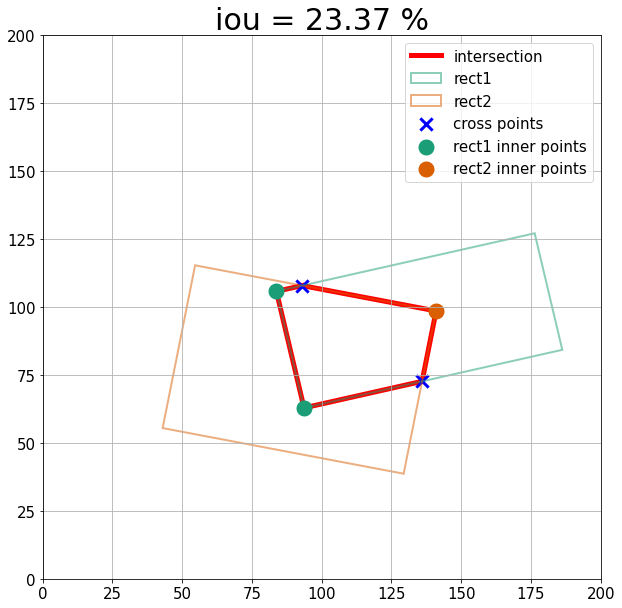

rect1 ara:  4180.0
rect2 ara:  5368.0
intersection ara:  1808.795
iou:  23.37


In [1291]:
# draw figure 
rect1 = patches.Polygon(np.array(xy_rect1).T, edgecolor='#1B9E77', alpha=0.5, linewidth=2, fill=False, label='rect1')
rect2 = patches.Polygon(np.array(xy_rect2).T, edgecolor='#D95F02', alpha=0.5, linewidth=2, fill=False, label='rect2')

cross_points_x = [x[0] for x in cross_points]
cross_points_y = [x[1] for x in cross_points]

rect1_inner_points_x = [x[0] for x in rect1_inner_points]
rect1_inner_points_y = [x[1] for x in rect1_inner_points]
rect2_inner_points_x = [x[0] for x in rect2_inner_points]
rect2_inner_points_y = [x[1] for x in rect2_inner_points]

intersection_points = np.array([list(x) for x in intersection_points])

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0,canvas_width)
ax.set_ylim(0,canvas_height)
ax.add_patch(rect1)
ax.add_patch(rect2)

intersection_area = 0
if len(intersection_points) > 2:
    hull = ConvexHull(intersection_points)
    intersection_area = round(hull.volume,3)
    convex_hull_intersection_points = intersection_points[hull.simplices]
    for i, simplex in enumerate(hull.simplices):
        if i == 0:
            label = 'intersection'
        else:
            label = None
        ax.plot(intersection_points[simplex, 0], intersection_points[simplex, 1], 'r-', linewidth=5, label=label, zorder=0)      
          
ax.scatter(cross_points_x, cross_points_y, facecolor='b', marker='x', s=150, linewidths=3, label='cross points')
ax.scatter(rect1_inner_points_x, rect1_inner_points_y,facecolor='#1B9E77',linewidths=10, label='rect1 inner points')
ax.scatter(rect2_inner_points_x, rect2_inner_points_y,facecolor='#D95F02',linewidths=10, label='rect2 inner points' )

ax.grid()
ax.legend(fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
iou = round(intersection_area / (rect1_area + rect2_area - intersection_area) * 100,2)
ax.set_title(f'iou = {iou} %', fontsize=30)
plt.show()

print('rect1 ara: ',rect1_area)
print('rect2 ara: ',rect2_area)
print('intersection ara: ',intersection_area)
print('iou: ',iou)